# Data Story
For this project, one of the key aspects I wanted to focus on was how video game sales could differ in the three main regions: North America, Europe and Japan. While there is still plenty to see globally, the goal is to see trends in each region and what factors are more specific for one compared to another. Of course, just because a plot shows that certain types of games do not do well in some areas does not mean that all will struggle there. This is more of a general idea of how video game sales are driven in these different regions.
<br>

To do this, I tried to keep plots grouped together so that it would be easier to see the difference in each. The main types of plots are Scatter Plots (including some with a logarithmic scale) as well as Bar Plots. There are plenty more visualizations I looked into but these ones stood out to me because of the trends and patterns they illustrate. After looking at all of these plots, I now have a clearer picture of what to delve into for my Inferential Statistical Analysis.

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster")
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [2]:
# Uploading Dataset and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Video Game Capstone Project/Data Wrangling/vg_df.csv', delimiter='\t', index_col=0)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Vita,PSP,Sega Dreamcast,Xbox,Xbox 360,Xbox One
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,...,0,0,0,0,0,0,0,0,0,0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,...,0,0,0,0,0,0,0,0,0,0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,...,0,0,0,0,0,0,0,0,0,0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,...,0,0,0,0,0,0,0,0,0,0
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,...,0,0,0,0,0,0,0,0,0,0


## Plot Group 1
Before we look into each region specifically, I think it is good to see how they compare with Global Sales. In the end, what matters most for a video game company is how much total money they make on a game, not just what a certain region brings in. So I looked at how the fraction of sales in each area is related to the fraction of Global Sales. These were used on a logarithmic scale so it would be easier see all of the points as well as any possible correlation. When it all came together, one can see which regions have the strongest relationship with Global Sales.

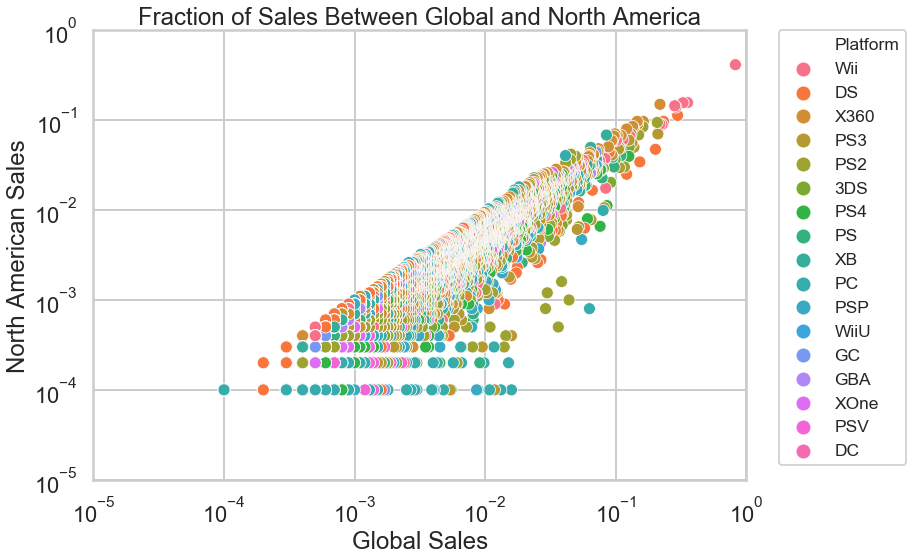

In [3]:
# Plotting fraction of sales from each game Globally vs. North America
ax = sns.scatterplot(x=df['Global_Sales'] / 100, y=df['NA_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('Global Sales')
ax.set_ylabel('North American Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between Global and North America')
plt.savefig('Fraction of Sales Between Global and North America.png')

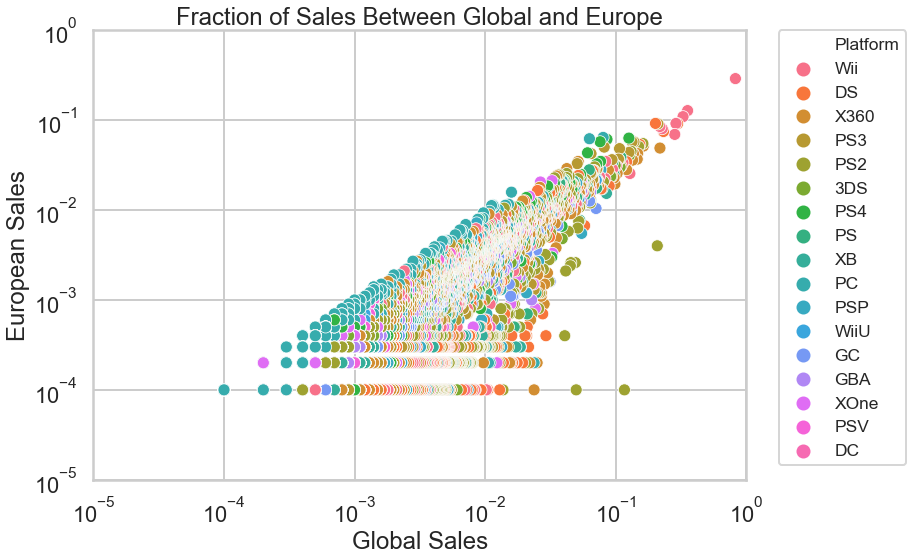

In [4]:
# Plotting fraction of sales from each game Globally vs. Europe
ax = sns.scatterplot(x=df['Global_Sales'] / 100, y=df['EU_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('Global Sales')
ax.set_ylabel('European Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between Global and Europe')
plt.savefig('Fraction of Sales Between Global and Europe.png')

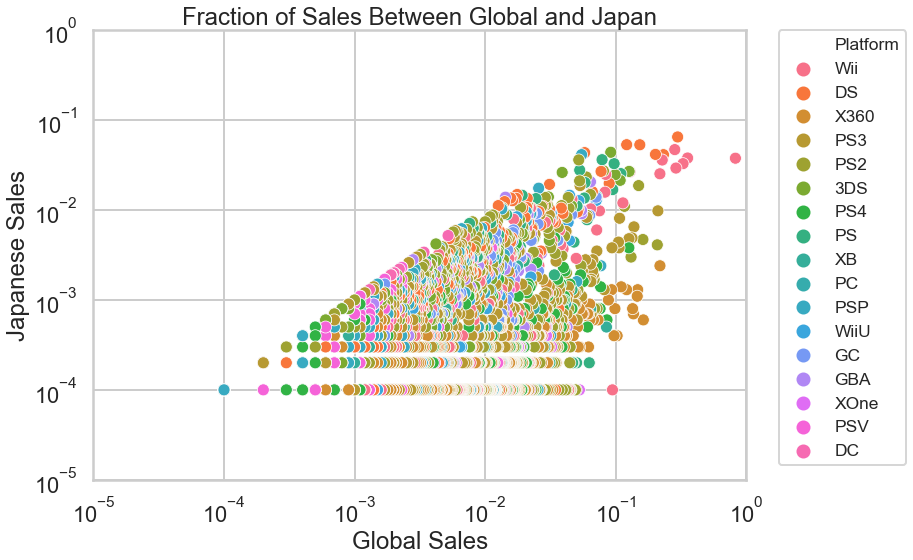

In [5]:
# Plotting fraction of sales from each game Globally vs. Japan
ax = sns.scatterplot(x=df['Global_Sales'] / 100, y=df['JP_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('Global Sales')
ax.set_ylabel('Japanese Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between Global and Japan')
plt.savefig('Fraction of Sales Between Global and Japan.png')

** There is a strong positive correlation between Global and North American sales as well as European Sales. The slopes have a steep upward direction with Nintendo Wii games sticking out near the top. This might signify how sales in these areas could be predictive of Global Sales overall. Japan, however, sees less of a positive correlation. That is not to say that this correlation is not good but what can be inferred is that there are games that sell really well worldwide but do not sell well in Japan.**

## Plot Group 2
One thing to keep in mind when comparing these regions is the difference in population. First off, North America and Europe represent multiple countries including the U.S. so there are a lot more people in those areas compared to Japan, which is just one country. While the population is still large, it is still much smaller than the other combined areas. To that end, I looked at the fraction of sales between each region to see if there were any deeper connections between them.

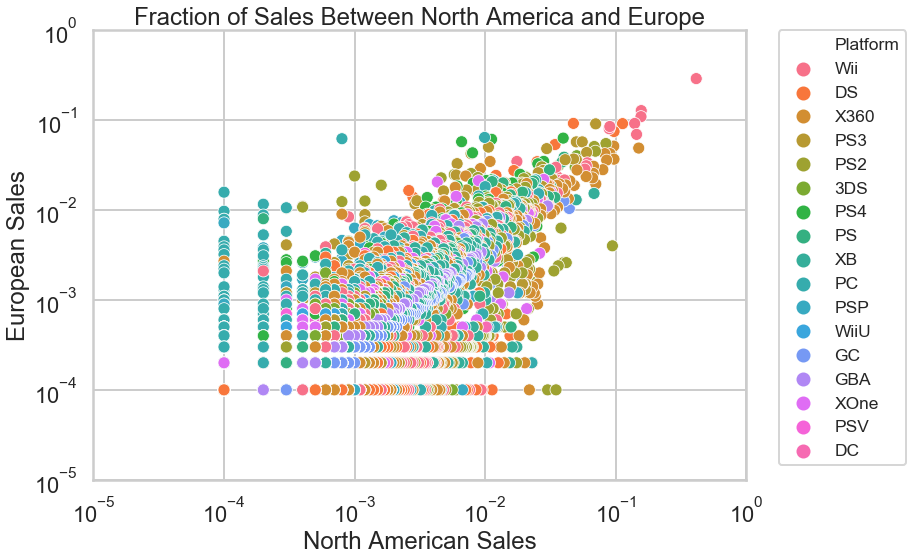

In [6]:
# Plotting fraction of sales from each game in North America vs. Europe
ax = sns.scatterplot(x=df['NA_Sales'] / 100, y=df['EU_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('North American Sales')
ax.set_ylabel('European Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between North America and Europe')
plt.savefig('Fraction of Sales Between North America and Europe.png')

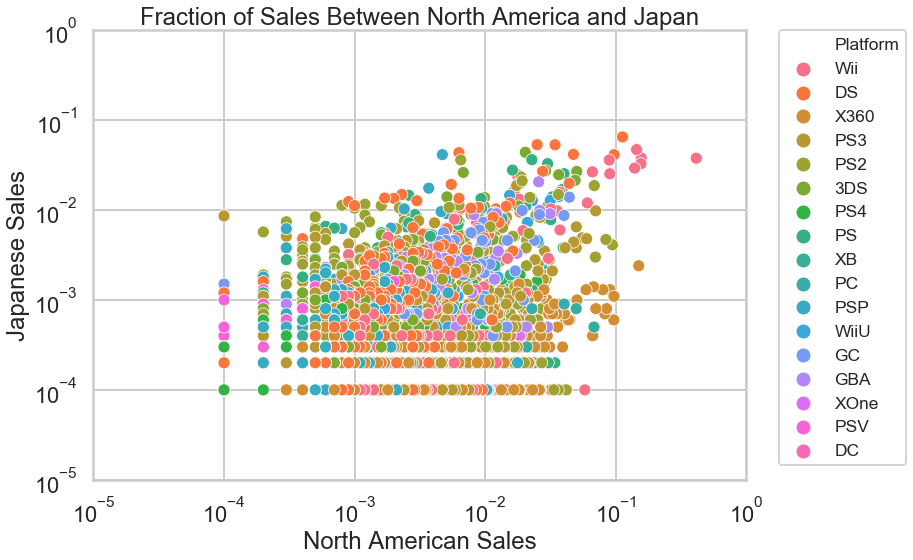

In [7]:
# Plotting fraction of sales from each game in North America vs. Japan
ax = sns.scatterplot(x=df['NA_Sales'] / 100, y=df['JP_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('North American Sales')
ax.set_ylabel('Japanese Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between North America and Japan')
plt.savefig('Fraction of Sales Between North America and Japan.png')

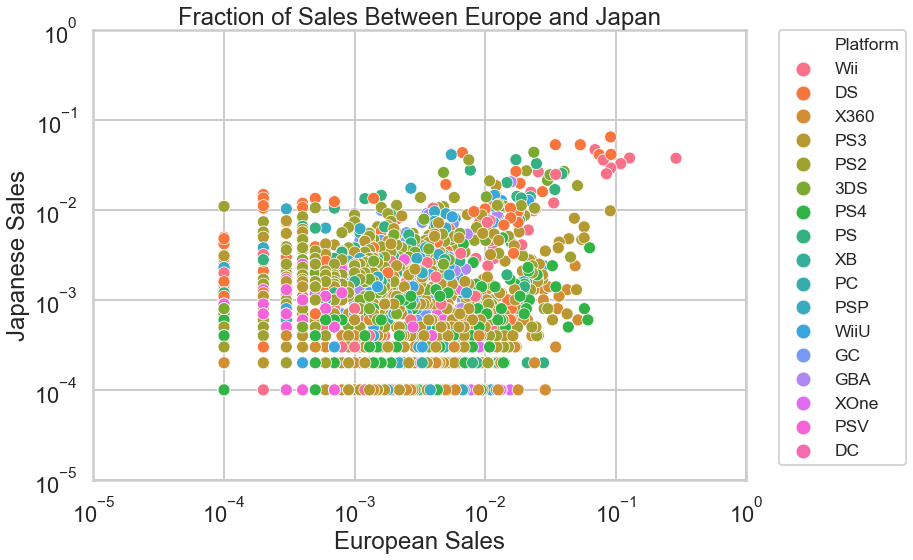

In [8]:
# Plotting fraction of sales from each game in Europe vs. Japan
ax = sns.scatterplot(x=df['EU_Sales'] / 100, y=df['JP_Sales'] / 100, data=df, hue=df['Platform'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-5, 1])
ax.set_ylim([1e-5, 1])
ax.set_xlabel('European Sales')
ax.set_ylabel('Japanese Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fraction of Sales Between Europe and Japan')
plt.savefig('Fraction of Sales Between Europe and Japan.png')

** Much like before, there is a strong positive correlation between North American and European sales while Japan's relationship with both is weaker. As mentioned earlier, part of this is the different population sizes but another may be opposite preferences. Some of the bigger, more mainstream types of games might be more popular in North America and Europe compared to Japan. While this group of plots offers plenty of insight, it is time to dig deeper into what types of games are bigger in these regions.**

## Plot Group 3
For looking at types of games, there were two specific factors I wanted to delve into: Genre and Platform. The genre was always important to me because there are so many different types of games out there and most gamers play more than one type of game. The platforms of the games are also important because they tell a lot about the consoles as well as companies that players prefer. One thing to keep in mind is that there are plenty of games that come out on multiple consoles so not every game is unique in that light. By looking at the below plots, one gets a better idea of the preferred genres and consoles in these three regions.

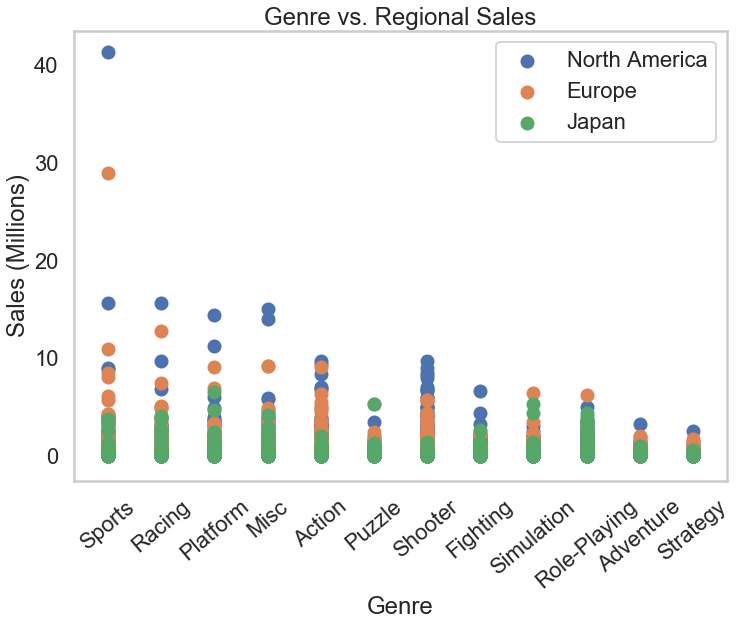

In [9]:
# Plotting Genre vs. Regional Sales
_ = plt.scatter(df['Genre'], df['NA_Sales'], label='North America')
_ = plt.scatter(df['Genre'], df['EU_Sales'], label='Europe')
_ = plt.scatter(df['Genre'], df['JP_Sales'], label='Japan')
_ = plt.grid(False)
_ = plt.xticks(rotation=40)
_ = plt.xlabel('Genre')
_ = plt.ylabel('Sales (Millions)')
_ = plt.legend(loc='upper right')
_ = plt.title('Genre vs. Regional Sales')
_ = plt.savefig('Genre vs. Regional Sales.png')

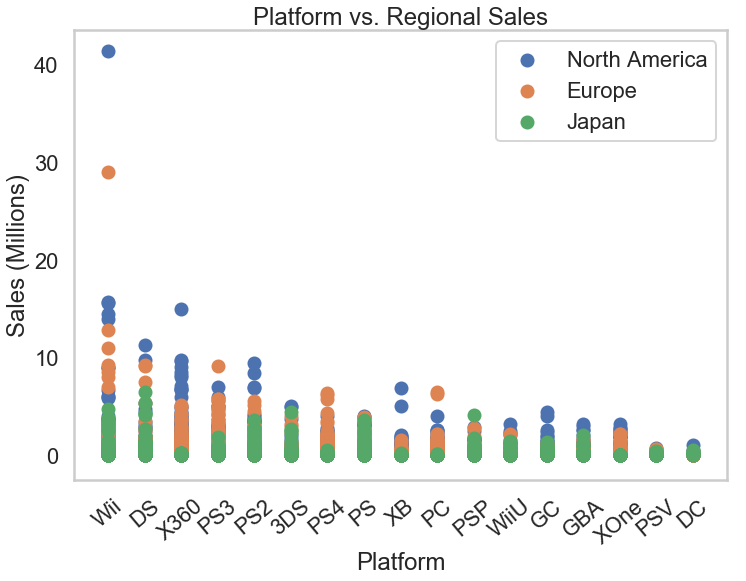

In [10]:
# Plotting Platform vs. Regional Sales
_ = plt.scatter(df['Platform'], df['NA_Sales'], label='North America')
_ = plt.scatter(df['Platform'], df['EU_Sales'], label='Europe')
_ = plt.scatter(df['Platform'], df['JP_Sales'], label='Japan')
_ = plt.grid(False)
_ = plt.xticks(rotation=40)
_ = plt.xlabel('Platform')
_ = plt.ylabel('Sales (Millions)')
_ = plt.legend(loc='upper right')
_ = plt.title('Platform vs. Regional Sales')
_ = plt.savefig('Platform vs. Regional Sales.png')

** For Genre, Sports games stand out the most followed by Racing and Platform games. Sports is not surprising to see at the top because of games like “Madden” as well as “FIFA” that come out every year and are always hot sellers. The outlier at the top is “Wii Sports,” which is a little misleading because, especially early on, the game came with the Wii console. One of the more surprising plot locations was that of Shooter games, which was more in the middle. That style has become big over the last decade or so, which may explain why it is the middle as of now. The genres near the end (Role-Playing, Adventure and Strategy) are not too surprising to see there as they are thought to be more for hardcore players.**
<br>

** In the Platform plot, “Wii Sports” is again the outlier at the top but Nintendo leads the way as Wii and DS games saw the most sales followed by Xbox 360 as well as PlayStation 2 and 3. This says a lot about Nintendo's hardcore fans as these systems are from previous generations of consoles and while the Wii U may have struggled, it is apparent how big Nintendo's fan base is. The order for most of these consoles by games sold is not too surprising except for possibly Xbox One. But one thing to keep in mind is that newer systems are still growing by the time this data was available so in a few years, they could be much higher. And if you are wondering why more classic consoles are not on this (like NES and SNES) that is because those games had a lot of missing data so they were dropped. Overall, this plot shows what many would expect when it comes to games sold by console.**

## Plot Group 4
After looking at the previous plots, the next step is looking at where certain types of genres are big. While there are many different genres to break down, one of the biggest ones is Shooters. Because of games like “Call of Duty,” that genre has become huge but yet it was only in the middle of the plot. Why is that? A look at those games sold in each region tells part of the story.

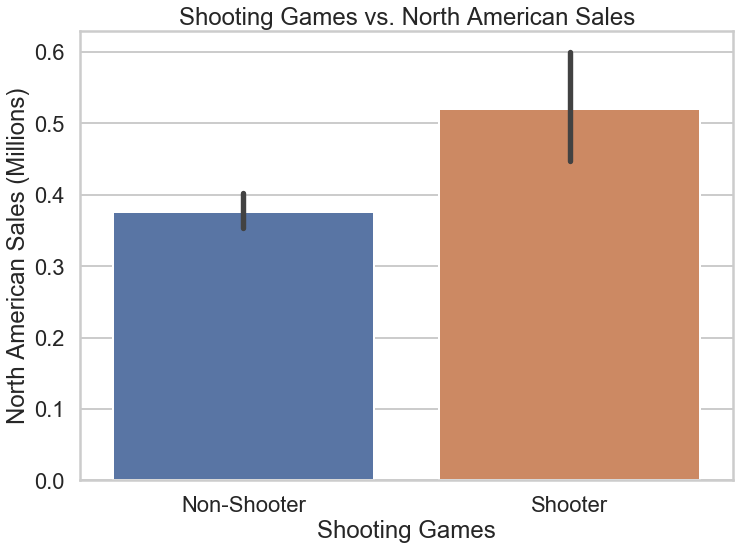

In [11]:
# Plotting Shooting Games vs. North American Sales
_ = sns.barplot(x=df['Shooter'], y=df['NA_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Shooter', 'Shooter'])
_ = plt.xlabel('Shooting Games')
_ = plt.ylabel('North American Sales (Millions)')
_ = plt.title('Shooting Games vs. North American Sales')
_ = plt.savefig('Shooting Games vs. North American Sales.png')

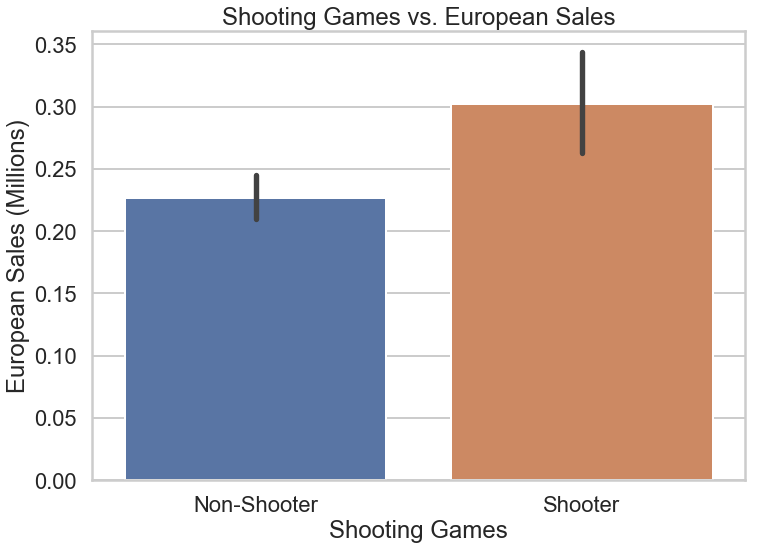

In [12]:
# Plotting Shooting Games vs. European Sales
_ = sns.barplot(x=df['Shooter'], y=df['EU_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Shooter', 'Shooter'])
_ = plt.xlabel('Shooting Games')
_ = plt.ylabel('European Sales (Millions)')
_ = plt.title('Shooting Games vs. European Sales')
_ = plt.savefig('Shooting Games vs. European Sales.png')

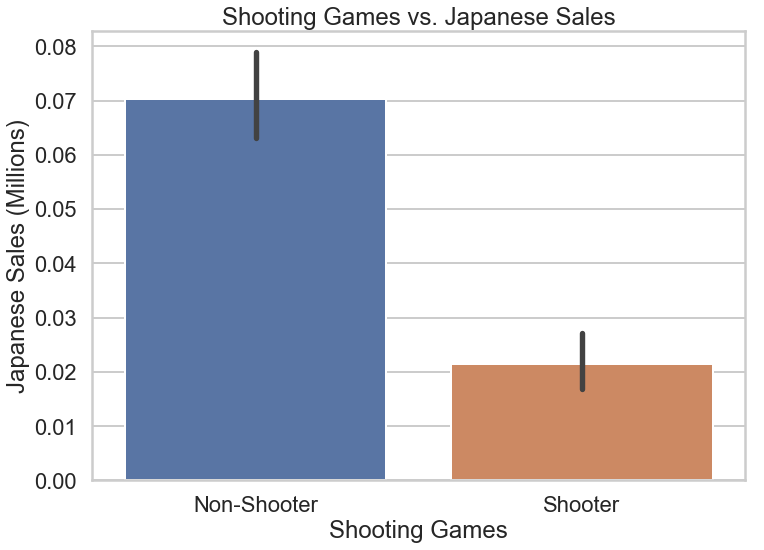

In [13]:
# Plotting Shooting Games vs. Japanese Sales
_ = sns.barplot(x=df['Shooter'], y=df['JP_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Shooter', 'Shooter'])
_ = plt.xlabel('Shooting Games')
_ = plt.ylabel('Japanese Sales (Millions)')
_ = plt.title('Shooting Games vs. Japanese Sales')
_ = plt.savefig('Shooting Games vs. Japanese Sales.png')

** While there is a definite preference for Shooters in North America and Europe, there is a steep drop when it come to Japan. Only about 0.02 million in sales came from Shooting games while North America and Europe had much higher amounts. Although Japan may have the smallest population of these regions, it still says a lot about why Shooters have not reached the level of Sports and Racing games yet. As big as they are in the U.S., Shooting games still have a ways to go in Japan.**

## Plot Group 5
Continuing to look at genres, I think it is important to consider the less popular categories and get an idea of why they may not be selling that well. Role-Playing games (or RPGs as they are known by) are near the end of the spectrum. Yet, major franchises like “Pokémon” and “Final Fantasy” are RPGs so clearly there is a market for them. The question is, where is it?

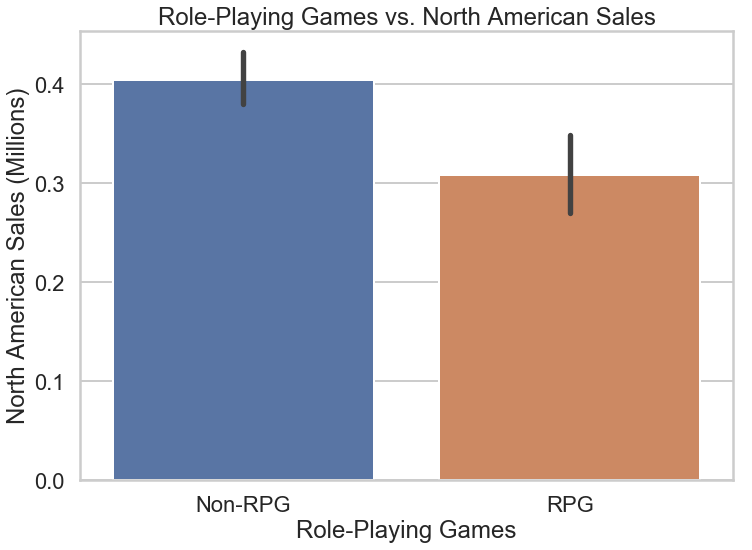

In [14]:
# Plotting Role-Playing Games vs. North American Sales
_ = sns.barplot(x=df['RPG'], y=df['NA_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-RPG', 'RPG'])
_ = plt.xlabel('Role-Playing Games')
_ = plt.ylabel('North American Sales (Millions)')
_ = plt.title('Role-Playing Games vs. North American Sales')
_ = plt.savefig('Role-Playing Games vs. North American Sales.png')

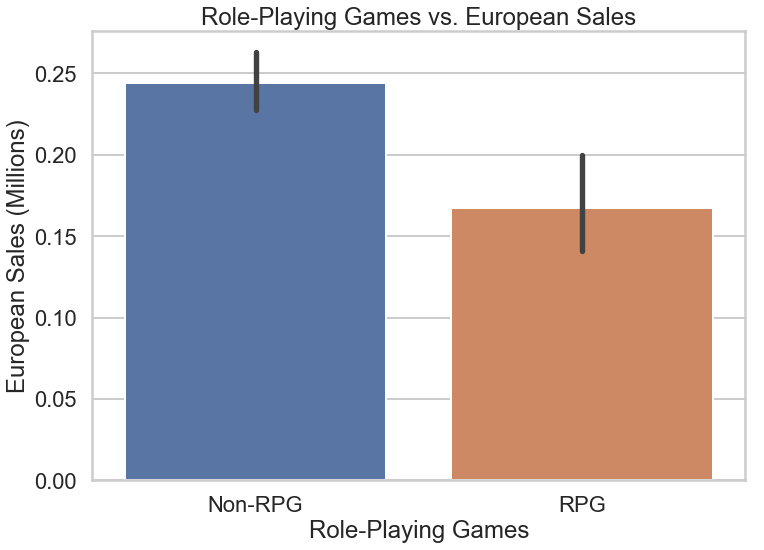

In [15]:
# Plotting Role-Playing Games vs. European Sales
_ = sns.barplot(x=df['RPG'], y=df['EU_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-RPG', 'RPG'])
_ = plt.xlabel('Role-Playing Games')
_ = plt.ylabel('European Sales (Millions)')
_ = plt.title('Role-Playing Games vs. European Sales')
_ = plt.savefig('Role-Playing Games vs. European Sales.png')

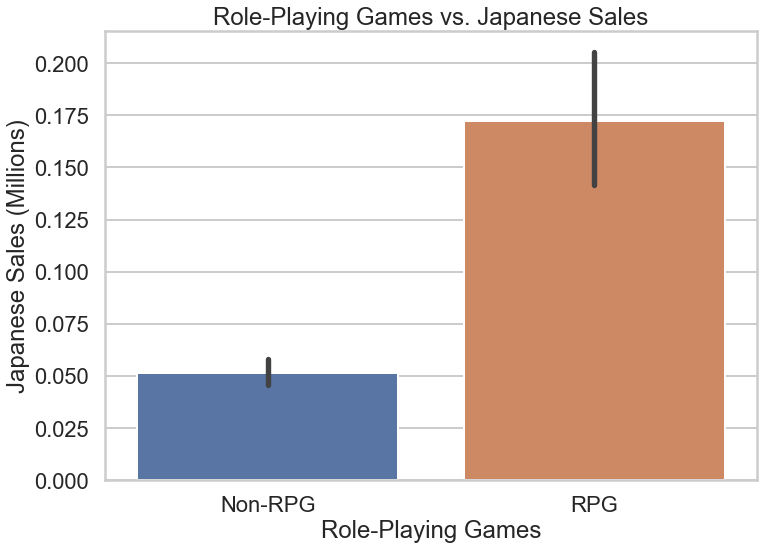

In [16]:
# Plotting Role-Playing Games vs. Japanese Sales
_ = sns.barplot(x=df['RPG'], y=df['JP_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-RPG', 'RPG'])
_ = plt.xlabel('Role-Playing Games')
_ = plt.ylabel('Japanese Sales (Millions)')
_ = plt.title('Role-Playing Games vs. Japanese Sales')
_ = plt.savefig('Role-Playing Games vs. Japanese Sales.png')

** Unlike Shooters, RPGs are huge in Japan but not very big in North America and Europe. While that is not saying they are unpopular, it makes a little more sense for why it is lower on the list of popular genres. This speaks more to the point of the earlier plots that showed how much correlation there is between Global Sales with North American as well as European sales. Despite how popular RPGs are in Japan, that is not enough to make it one of the most popular genres worldwide.**

## Plot Group 6
Looking at the major consoles from before, one that may have surprised some is how high up Nintendo DS games were. While the Nintendo Wii made sense because of its mainstream appeal with motion controls, the DS is just a handheld system, which, while popular, normally do not do as well compared to home consoles. Also, the Nintendo DS was a generation before some of the other top platforms, while its follow-up, the Nintendo 3DS, was more in the middle. So what made Nintendo DS games place so highly on the plot?

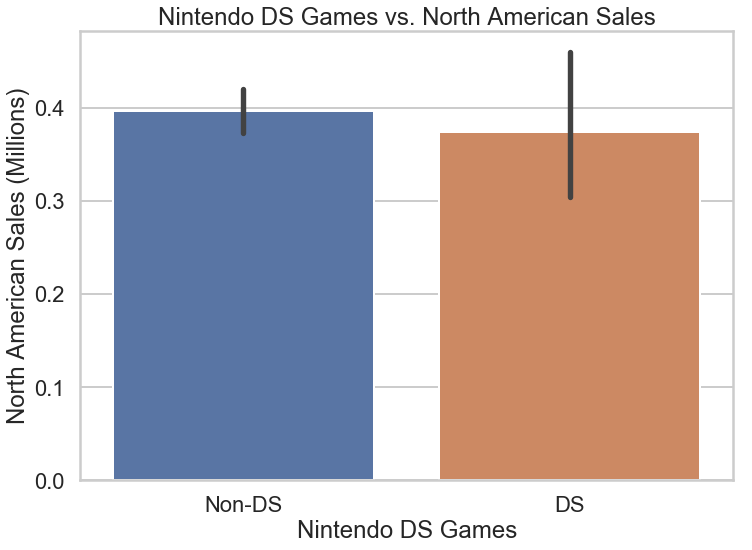

In [17]:
# Plotting Nintendo DS Games vs. North American Sales
_ = sns.barplot(x=df['Nintendo DS'], y=df['NA_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-DS', 'DS'])
_ = plt.xlabel('Nintendo DS Games')
_ = plt.ylabel('North American Sales (Millions)')
_ = plt.title('Nintendo DS Games vs. North American Sales')
_ = plt.savefig('Nintendo DS Games vs. North American Sales.png')

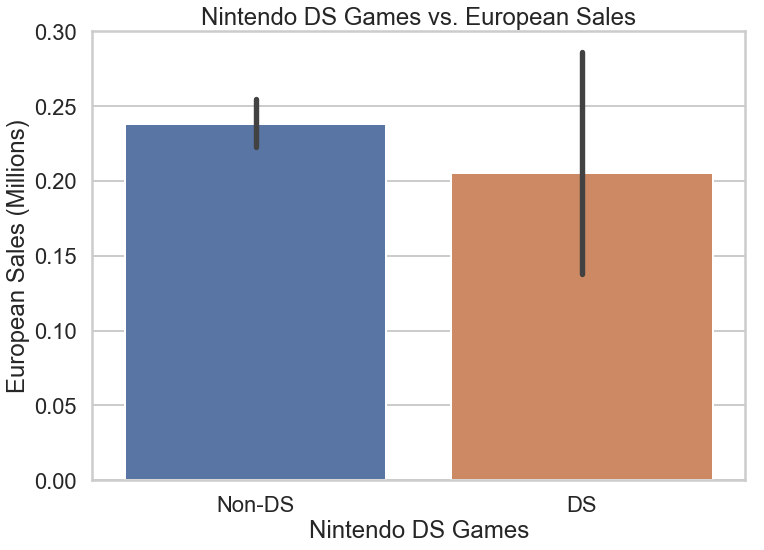

In [18]:
# Plotting Nintendo DS Games vs. European Sales
_ = sns.barplot(x=df['Nintendo DS'], y=df['EU_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-DS', 'DS'])
_ = plt.xlabel('Nintendo DS Games')
_ = plt.ylabel('European Sales (Millions)')
_ = plt.title('Nintendo DS Games vs. European Sales')
_ = plt.savefig('Nintendo DS Games vs. European Sales.png')

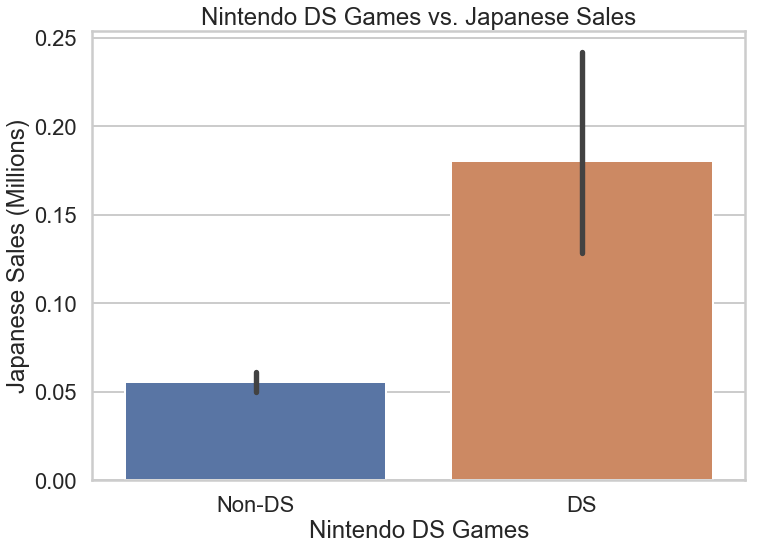

In [19]:
# Plotting Nintendo DS Games vs. Japanese Sales
_ = sns.barplot(x=df['Nintendo DS'], y=df['JP_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-DS', 'DS'])
_ = plt.xlabel('Nintendo DS Games')
_ = plt.ylabel('Japanese Sales (Millions)')
_ = plt.title('Nintendo DS Games vs. Japanese Sales')
_ = plt.savefig('Nintendo DS Games vs. Japanese Sales.png')

** Despite many of the previous plots, the impact of Japan is finally seen with the sale of DS games. While the games would not be called unpopular in North America and Europe, they did not sell better than non-DS games yet Japan saw a pretty sizeable increase. Although its population may be the smallest of these three regions, it can still have a big impact on sales and the Nintendo DS is a great example why. Nintendo may be popular worldwide but Japan will always be one of their staunchest supporters.**

## Plot Group 7
Soon after the Nintendo DS in the console games spectrum is the Microsoft Xbox 360. Doing far better than its predecessor, the Xbox, this system rose in the last decade or so similar to the Shooting genre. And with Microsoft being an American company, it would make sense that it did well in North America. But while those games may have been popular here, it does not mean they were big everywhere.

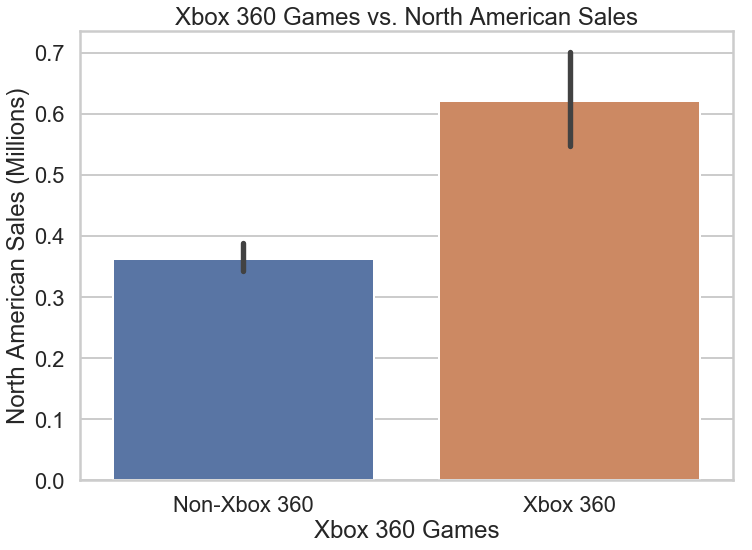

In [20]:
# Plotting Xbox 360 Games vs. North American Sales
_ = sns.barplot(x=df['Xbox 360'], y=df['NA_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Xbox 360', 'Xbox 360'])
_ = plt.xlabel('Xbox 360 Games')
_ = plt.ylabel('North American Sales (Millions)')
_ = plt.title('Xbox 360 Games vs. North American Sales')
_ = plt.savefig('Xbox 360 Games vs. North American Sales.png')

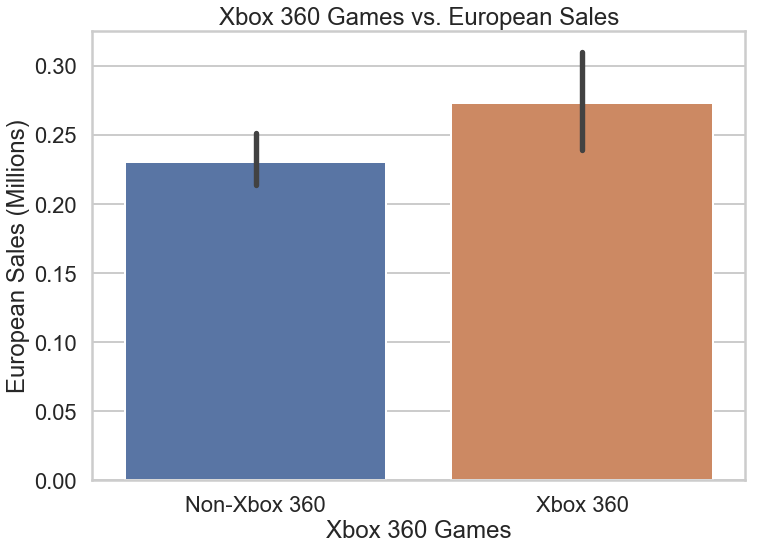

In [21]:
# Plotting Xbox 360 Games vs. European Sales
_ = sns.barplot(x=df['Xbox 360'], y=df['EU_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Xbox 360', 'Xbox 360'])
_ = plt.xlabel('Xbox 360 Games')
_ = plt.ylabel('European Sales (Millions)')
_ = plt.title('Xbox 360 Games vs. European Sales')
_ = plt.savefig('Xbox 360 Games vs. European Sales.png')

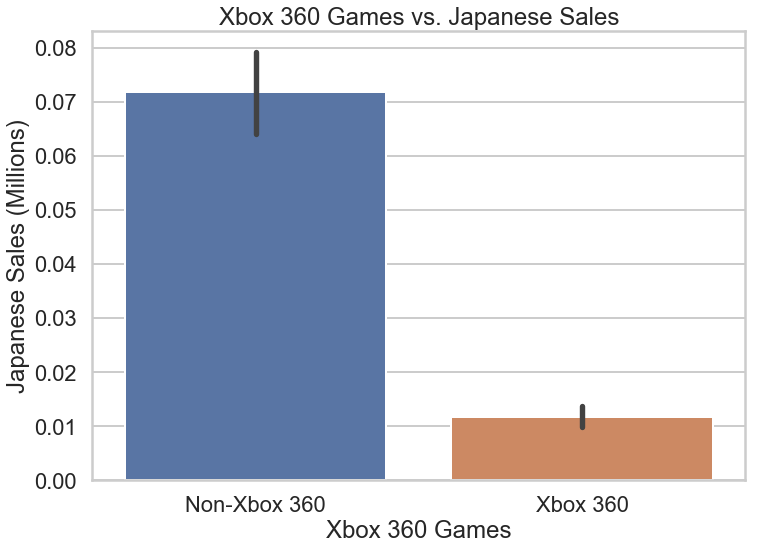

In [22]:
# Plotting Xbox 360 Games vs. Japanese Sales
_ = sns.barplot(x=df['Xbox 360'], y=df['JP_Sales'], data=df)
_ = plt.xticks([0, 1], ['Non-Xbox 360', 'Xbox 360'])
_ = plt.xlabel('Xbox 360 Games')
_ = plt.ylabel('Japanese Sales (Millions)')
_ = plt.title('Xbox 360 Games vs. Japanese Sales')
_ = plt.savefig('Xbox 360 Games vs. Japanese Sales.png')

** It is surprising to see just how unpopular Xbox 360 games are in Japan as there is not just a decline but instead more of a massive jump down. North America and Europe were similar to what I would have expected but nothing prepared me for how poorly these games did in the East. Couple this with the previous plots about the Nintendo DS games and there is certainly pattern that describes the preferences of Japanese gamers. This speaks a lot to what Microsoft should do with the Xbox One and any upcoming consoles when it comes to Japan.**

## Plot Group 8
One of the final aspects I wanted to look into was how important Critic and User scores are to gamers. Personally, I do not focus too much on what other people say about a game unless I am already on the fence. If it is a game I know I want, it is unlikely that a review would shy me away from buying it. But some people do take these scores seriously as well as write user reviews so it does have an impact. The question is, how much?

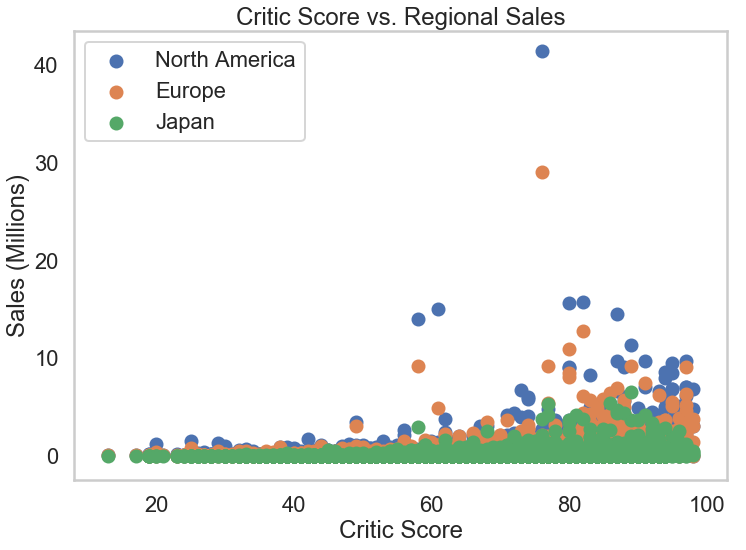

In [23]:
# Plotting Critic Score vs. Regional Sales
_ = plt.scatter(df['Critic_Score'], df['NA_Sales'], label='North America')
_ = plt.scatter(df['Critic_Score'], df['EU_Sales'], label='Europe')
_ = plt.scatter(df['Critic_Score'], df['JP_Sales'], label='Japan')
_ = plt.grid(False)
_ = plt.xlabel('Critic Score')
_ = plt.ylabel('Sales (Millions)')
_ = plt.legend(loc='upper left')
_ = plt.title('Critic Score vs. Regional Sales')
_ = plt.savefig('Critic Score vs. Regional Sales.png')

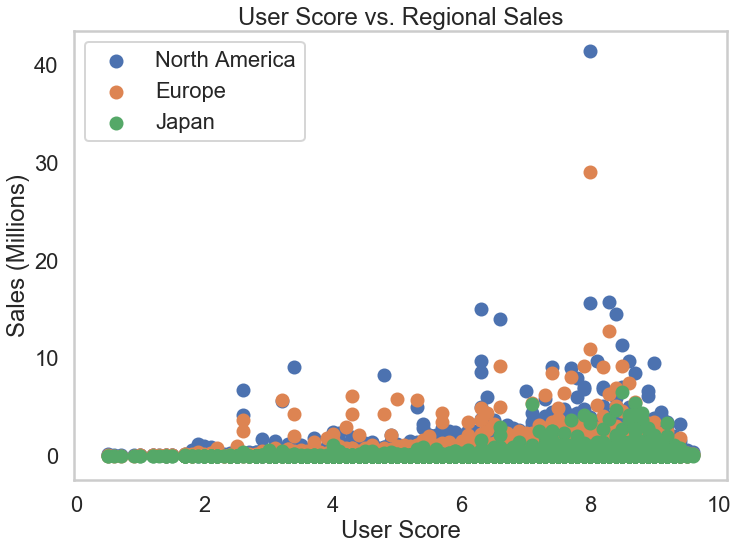

In [24]:
# Plotting User Score vs. Regional Sales
_ = plt.scatter(df['User_Score'], df['NA_Sales'], label='North America')
_ = plt.scatter(df['User_Score'], df['EU_Sales'], label='Europe')
_ = plt.scatter(df['User_Score'], df['JP_Sales'],  label='Japan')
_ = plt.grid(False)
_ = plt.xlabel('User Score')
_ = plt.ylabel('Sales (Millions)')
_ = plt.legend(loc='upper left')
_ = plt.title('User Score vs. Regional Sales')
_ = plt.savefig('User Score vs. Regional Sales.png')

** For both Critic and User score, the trend is as expected with sales tending to be stronger for higher-rated games. There are still plenty of games sold with lesser scores, which may be games with brand names or pop culture ties. However, the games with the highest sales do not tend to be ones with perfect scores. In fact scores around 80% seem to have the best sales. Also, it is important to consider an inverse relationship as the more popular games may receive more total reviews, which leads to more varied scores. But, overall, these plots explain what is expected when it comes to Critic and User scores vs. sales.**

# Conclusion
What stands out the most from these plots is how important North America and Europe are to sales overall. They not only have a positive correlation with each other but also globally. Yet Japan should not be an afterthought. While its population is smaller than the other regions, it had a big impact on the sale of Nintendo DS games and could be critical for how much bigger Shooting games become in the future. And when it came to reviews, 80% looks to be the ideal score for any video game developer.
<br>

While there were plenty more plots I looked at, these stood out because of the important trends as described above. These regions have varied preferences especially when looking at Japan, but that does not mean these are set in stone. Throughout the history of video games, different genres always rise much like how Platformers were big in the '90s. The next step is digging deeper into these plots with inferential statistics to find out which really are important factors in video game sales.